# NLTK 자연어 처리 패키지
- Natural Language Toolkit 패키지는 교육용으로 개발된 자연어 처리 및 문서 분석용 파이썬 패키지

**주요기능**
- 말뭉치(corpus): 자연어 분석을 위해 만든 샘플 문서의 집합
- 토큰 생성(Tokenizer): 긴 문자열 분석을 위해 작은 단위로 나누는 것(문자열 단위 - 토큰)
- 형태소 분석(morpheme): 언어학에서는 뜻이 있는 가장 작은 말의 단위
  - 어간 추출(stemming)
  - 원형 복원
- 품사 태깅(POS, Part-Of-Speech)

In [1]:
!pip install nltk

## 말뭉치(corpus)
- 자연어 분석을 위해 만들어진 샘플 문서 집합

In [47]:
import nltk
nltk.download('book', quiet=True)
# quiet=True: 다운로드한 문서의 목록을 추출
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
# 저작권이 만료된 문학작품을 포함한 말뭉치 gutenberg
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [5]:
emma_raw = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(emma_raw[:1300])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

## 토큰 생성(tokenizer)
- 토큰(token)
- 정규표현식: 문장, 단어, 글자단위

In [6]:
from nltk.tokenize import sent_tokenize
print(sent_tokenize(emma_raw[:1300])[3])

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.


In [7]:
from nltk.tokenize import word_tokenize
word_tokenize(emma_raw[50:100])

['Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a']

In [8]:
from nltk.tokenize import RegexpTokenizer
# pattern
## \w: 영문자, 숫자
## +: 단어 단위
pat = RegexpTokenizer('[\w]+')
pat.tokenize(emma_raw[50:100])

['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소 분석
- 형태소(morpheme): 뜻이 있는 가장 작은 말의 단위
- 자연어 처리에서는 토큰으로 형태소를 이용
- 형태소 분석: 단어로부터 어근, 접두사, 접미사, 품사 등 다양한 언어의 속성을 파악하고 이를 이용하여 형태소를 찾아내거나 차리하는 작업
- 어간 추출 => 단어의 기본형
- 원형 복원 => 시제를 가지고 있는 단어의 어간을 찾아주는 작업
- 품사 부착 => 명사, 형용사, 동사...

In [9]:
# 어간 추출: 단순히 어미만 제거할 뿐 단어의 원형을 정확히 찾아주지 못한다.
from nltk.stem import PorterStemmer, LancasterStemmer

s1 = PorterStemmer()
s2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

print('Poter: ', [s1.stem(w) for w in words])
print('Lancaster: ', [s2.stem(w) for w in words])

Poter:  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster:  ['fly', 'fli', 'fly', 'flew', 'flown']


In [10]:
# 원형 복원: 같은 의미를 가진 여러 단어를 사전형으로 통일하는 작업
from nltk.stem import WordNetLemmatizer

lm = WordNetLemmatizer()
print([lm.lemmatize(w, pos='v') for w in words])
# pos: 품사를 알려주는 옵션(v: 동사, n: 명사)

['fly', 'fly', 'fly', 'fly', 'fly']


## 품사 부착(POS)
- 품사: 단어의 문법적인 기능이나 형태, 뜻으로 구분하는 것
  - NNP: 고유명사(단수)
  - VB: 동사
  - VBP: 동사 현재형
  - TO: 전치사
  - NN: 명사(단수 & 복수)
  - DT: 관용사

In [11]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [13]:
# pos_tag(): 단어 토큰에 품사를 부착하여 튜플로 추출
from nltk.tag import pos_tag
sentence = 'Emma refused to permit us to obtain the refuse permit'
tag_list = pos_tag(word_tokenize(sentence))
tag_list

[('Emma', 'NNP'),
 ('refused', 'VBD'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [15]:
# 분석할 품사를 선택해서 해당 품사의 토큰만 추출
nouns_list = [t[0] for t in tag_list if t[1] == 'NN']
nouns_list

['refuse', 'permit']

In [16]:
# untag(): 품사를 제거하고 추출
from nltk.tag import untag
untag(tag_list)

['Emma',
 'refused',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [21]:
def tokenizer(doc):
  return ['/'.join(p) for p in tag_list]

tokenizer(sentence)

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [20]:
['/'.join(p) for p in tag_list]

['Emma/NNP',
 'refused/VBD',
 'to/TO',
 'permit/VB',
 'us/PRP',
 'to/TO',
 'obtain/VB',
 'the/DT',
 'refuse/NN',
 'permit/NN']

In [1]:
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install mglearn
import mglearn

# 음수표현 라이브러리
plt.rcParams['axes.unicode_minus'] = False

# 경고무시
import warnings
warnings.filterwarnings("ignore")

# 매직명령어 : 시각화 결과가 노트북에 포함되도록
%matplotlib inline

# KONLP

In [14]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 58.5 MB/s eta 0:00:00


In [15]:
import konlpy

## 한국어 말뭉치
- 대한민국 헌법 말뭉치 kolaw
- 국회법안 말뭉치 kobill
- 말뭉치 파일 리스트 fileids, open(해당 파일을 읽는다)

In [16]:
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [17]:
c = kolaw.open('constitution.txt').read()
print(c)

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.

       제1장 총강
  제1조 ① 대한민국은 민주공화국이다.
②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.
  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.
②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.
  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.
  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.
  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.
②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.
  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.
②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.
  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.
②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.
  제8조 ① 정당의 설립은 자유이며, 복수정당제

In [20]:
from konlpy.corpus import kobill
kobill.fileids()

['1809897.txt',
 '1809895.txt',
 '1809894.txt',
 '1809893.txt',
 '1809899.txt',
 '1809892.txt',
 '1809890.txt',
 '1809891.txt',
 '1809898.txt',
 '1809896.txt']

## 형태소 분석
- Hannanum: 한나눔
- Kkma: 꼬꼬마
- Open Korean Text: 오픈 소스 한국어 분석기(구, 트위터 형태소 분석기)

In [18]:
from konlpy.tag import *

han = Hannanum()
kk = Kkma()
okt = Okt()

In [22]:
han

# 나이브베이스
- 베이즈 정리를 기반으로 한 통계적 분류 기법
- 가장 단순한 지도 학습 알고리즘
- 나이브 베이스 분류기는 빠르고 정확하며 믿음직하다.

In [23]:
# 시각화용 한글 사용 가능하게하는 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,678 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120874 files and dire

In [2]:
plt.rc('font', family='NanumGothic')

# Dataset Loading

In [41]:
data = pd.read_csv('spam.csv')
data.head()

,Unnamed: 0,target,text
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [42]:
data.drop(['Unnamed: 0'], inplace=True, axis=1)

In [43]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## 스팸 여부 판단
- 문자 데이터셋을 이용하여 스팸 여부를 판단하는 문제
- 독립변수(text)

In [26]:
data['target'].value_counts() # 편향이 심한 데이터셋

ham     4827
spam     747
Name: target, dtype: int64

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Preprocessing

## 특수문자 제거

In [28]:
import string
# punctuation: 특수문자 기호 목록
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
# in: 문자 in 문자열
# not in: 문자 not in 문자열
new_string = []
sample = 'Go to home'
for i in sample:
  if i not in string.punctuation:
    new_string.append(i)

In [30]:
new_string

['G', 'o', ' ', 't', 'o', ' ', 'h', 'o', 'm', 'e']

In [31]:
test = ['a', 'p', 'p', 'l', 'e']
test

['a', 'p', 'p', 'l', 'e']

In [32]:
'_'.join(test)

'a_p_p_l_e'

In [33]:
''.join(test)

'apple'

In [34]:
new_string = []
sample = 'Go to home'
for i in sample:
  if i not in string.punctuation:
    new_string.append(i)

new_string = ''.join(new_string)

In [35]:
new_string

'Go to home'

In [40]:
# 특수기호를 제거한 후 문장을 되돌려주는 역할을 수행하는 함수를 구현
def remove_punc(x):
  new_string=[]
  for i in x:
    if i not in string.punctuation:
      new_string.append(i)

  new_string = ''.join(new_string)
  return new_string

In [37]:
sample

'Go to home'

In [44]:
remove_punc(sample)

'Go to home'

In [45]:
data['text'] = data['text'].apply(remove_punc)
data['text']

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

## 불용어 제거
- 불용어(stopword): 자연어 분석에서 큰 의미가 없는 단어를 의미한다.
- 불용어 사전
- 한국어 불용어 사전: https://www.ranks.nl/stopwords/korean

In [48]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [49]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
sample = data['text'].loc[0]
sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [53]:
# lower()
# upper()
# capitalize()
for w in sample.split():
  if w.lower() not in stopwords.words('english'):
    print(w)

Go
jurong
point
crazy
Available
bugis
n
great
world
la
e
buffet
Cine
got
amore
wat


In [54]:
# 불용어를 제거하고 원래의 문장으로 되돌려주는 함수 구현
def stop_word(x):
  new_string=[]
  for w in x.split():
    if w.lower() not in stopwords.words('english'):
      new_string.append(w.lower())

  # 단어 단위로
  new_string=' '.join(new_string)
  return new_string

In [55]:
data['text'] = data['text'].apply(stop_word)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

## target 값 정형화 처리

In [56]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

In [57]:
sample = pd.Series(['a' ,'b', 'c'])
sample

0    a
1    b
2    c
dtype: object

In [58]:
sample.map({'a':'apple', 'b':'banana', 'c':'candy'})

0     apple
1    banana
2     candy
dtype: object

In [59]:
data['target'] = data['target'].map({'spam':1, 'ham':0})

In [60]:
data.head()

,target,text
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


## text 피처 값을 벡터화
- 카운드 기반 벡터화: 문자를 개수 기반으로 벡터화하는 방식
- 데이터 전체에 존재하는 모든 문자를 사전처럼 모은 뒤에 고유 인덱스를 부여하고, 문자마다 속한 단어가 있는 인덱스를 카운트하는 방식

In [62]:
x = data['text']
y = data['target']

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
# 지도학습: fit(), predict(), score()
# 비지도학습: fit(), transform() (fit_transform())

cv = CountVectorizer()
cv.fit(x)

# 문장 전체 단어의 고유인덱스를 추출
cv.vocabulary_

{'go': 3791,
 'jurong': 4687,
 'point': 6433,
 'crazy': 2497,
 'available': 1414,
 'bugis': 1881,
 'great': 3888,
 'world': 9184,
 'la': 4847,
 'buffet': 1879,
 'cine': 2214,
 'got': 3848,
 'amore': 1181,
 'wat': 8947,
 'ok': 5995,
 'lar': 4886,
 'joking': 4655,
 'wif': 9079,
 'oni': 6027,
 'free': 3577,
 'entry': 3160,
 'wkly': 9136,
 'comp': 2330,
 'win': 9093,
 'fa': 3296,
 'cup': 2553,
 'final': 3421,
 'tkts': 8380,
 '21st': 454,
 'may': 5335,
 '2005': 441,
 'text': 8217,
 '87121': 875,
 'receive': 6833,
 'questionstd': 6724,
 'txt': 8592,
 'ratetcs': 6776,
 'apply': 1267,
 '08452810075over18s': 71,
 'dun': 3011,
 'say': 7192,
 'early': 3031,
 'hor': 4222,
 'already': 1154,
 'nah': 5682,
 'dont': 2918,
 'think': 8291,
 'goes': 3805,
 'usf': 8741,
 'lives': 5050,
 'around': 1318,
 'though': 8310,
 'freemsg': 3585,
 'hey': 4118,
 'darling': 2617,
 'weeks': 9002,
 'word': 9170,
 'back': 1464,
 'id': 4343,
 'like': 5000,
 'fun': 3652,
 'still': 7860,
 'tb': 8147,
 'xxx': 9309,
 'std': 

In [64]:
x = cv.transform(x)
print(x)
## (문장순서, 고유인덱스, 카운트개수)

  (0, 1181)	1
  (0, 1414)	1
  (0, 1879)	1
  (0, 1881)	1
  (0, 2214)	1
  (0, 2497)	1
  (0, 3791)	1
  (0, 3848)	1
  (0, 3888)	1
  (0, 4687)	1
  (0, 4847)	1
  (0, 6433)	1
  (0, 8947)	1
  (0, 9184)	1
  (1, 4655)	1
  (1, 4886)	1
  (1, 5995)	1
  (1, 6027)	1
  (1, 9079)	1
  (2, 71)	1
  (2, 441)	1
  (2, 454)	1
  (2, 875)	1
  (2, 1267)	1
  (2, 2330)	1
  :	:
  (5570, 3188)	1
  (5570, 3564)	1
  (5570, 3810)	1
  (5570, 4188)	1
  (5571, 5566)	1
  (5571, 6359)	1
  (5571, 7611)	1
  (5571, 7986)	1
  (5572, 999)	1
  (5572, 1665)	1
  (5572, 1916)	1
  (5572, 3103)	1
  (5572, 3577)	1
  (5572, 3701)	1
  (5572, 3950)	1
  (5572, 4343)	1
  (5572, 4480)	1
  (5572, 5000)	1
  (5572, 5777)	1
  (5572, 7636)	1
  (5572, 8731)	1
  (5572, 8997)	1
  (5573, 5688)	1
  (5573, 7052)	1
  (5573, 8538)	1


In [65]:
data.loc[0]['text']

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [66]:
# 고유 인덱스 추출
print(cv.vocabulary_['go'])
print(cv.vocabulary_['jurong'])
print(cv.vocabulary_['point'])

3791
4687
6433


## train / test 분리

In [68]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state = 100)

# Modeling

**사이킷런에서 제공하는 나이브베이스 모형**
- GaussianNB: 가우시안 정규분포 나이브베이스
- BernoulliNB: 베르누이분포 나이브베이스
- MultinomualNB: 다항분포 나이브베이스

In [69]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(x_train, y_train)

pred = nb.predict(x_test)

In [71]:
# 분류 알고리즘은 정확도만으로 평가하기엔 부족하다 따라서 혼동행렬도 함께 사용
from sklearn.metrics import accuracy_score, confusion_matrix

# 평가지표(실제값, 예측값)
## 정확도
print(accuracy_score(y_test, pred))
## 혼동행렬
print(confusion_matrix(y_test, pred))

0.9748878923766816
[[947  19]
 [  9 140]]


<Axes: >

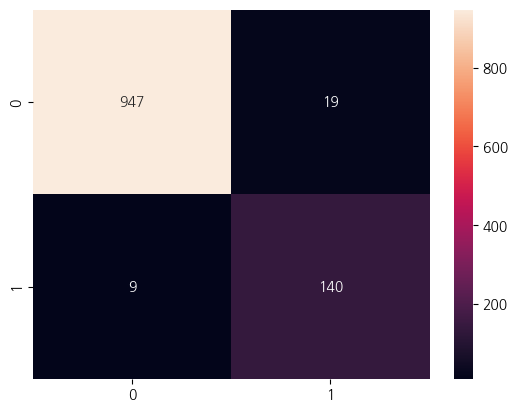

In [72]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.0f')
# annot=True: 숫자도 함께 표시

- 실제값 ham(0), 예측값(0): 947건(TN)
- 실제값 spam(1), 예측값(1): 140건(TP)
- 실제값 spam(1), 예측값(0): 9건(FN) -- 2종오류
- 실제값 ham(0), 예측값(1): 19건(FP) -- 1종오류